<h1 align="center">Hacettepe University<br>Department of Computer Science</h1> 
<h2 align="center">BBM 409 - Machine Learning Laboratory<br>2021 Fall</h2>
<h4 align="center">Assignment 4<br>Due on December 31, 2021</h4>

<table>
    <tr>
      <td><h4>Name Surname</h4></td>
      <td></td>
      <td><h4>Student ID</h4></td>
    </tr>
    <tr>
      <td><h4>Humeyra Uçar</h4></td>
      <td></td>
      <td><h4>21827957</h4></td>
    </tr>
    <tr>
      <td><h4>Murat Çelik</h4></td>
      <td></td>
      <td><h4>21827263</h4></td>
    </tr>
</table>


## Table of Contents
- [1. Introduction](#1)
- [2. Part 1: Multi Layer Neural Network](#2)
	- [2.1 Introduction of Multi Layer Neural Network](#2.1)
	- [2.2 Preprocessing of Data](#2.2)
		- [2.2.1 Number of Data](#2.2.1)
	- [2.3 Single Layer Neural Network](#2.3)
	- [2.4 Neural Network with One Hidden Layer](#2.4)
		- [2.4.1 Compare Activation Function](#2.4.1)
		- [2.4.2 Compare Unit/Node Number in the Hidden Layer](#2.4.2)
	- [2.5 Neural Network with Two Hidden Layer](#2.5)
		- [2.5.1 Compare Activation Function](#2.5.1)
		- [2.5.2 Compare Unit/Node Number in the Hidden Layer](#2.5.2)
	- [2.6 Multi Layer Neural Network ](#2.6)
		- [2.6.1 Mini-Batch Gradient Descent](#2.6.1)
	- [2.7 Neural Network with Optimal Hyperparameters](#2.7)
- [3. Part 2: Convolutional Neural Network](#3)
	- [3.1 Required Libraries for Part 2](#3.1)
	- [3.2 Hyperparameter Tuning](#3.2)
	- [3.3 Get Data](#3.3)
	- [3.4 Using Pre-trained Model with Pytorch](#3.4)
	- [3.5 Visualize Weight and Activation Matrices First Convolutional Layer](#3.5)
	- [3.6 Predict](#3.6)
    - [3.7 Analysis Metrics](#3.7)
- [4. Discussion](#4)
- [5. References](#5)

## 1. Introduction <a name='1'></a>

&emsp;&emsp; In this assignment, we examined the Animal Classification of Images problem using two techniques of Deep Learning, Neural Network and CNN. Deep Learning is basically an extended piece of machine learning that uses artificial neural networks. 

&emsp;&emsp; We will classify image data using two different deep learning techniques. For the multi-class classification problem, there are 10 classes listed below in our data. 

    – Class 1: Dog (Cane)                        – Class 6: Cat (Gatto)
    – Class 2: Horse (Cavallo)                   – Class 7: Cow (Mucca)
    – Class 3: Elephant (Elefante)               – Class 8: Sheep (Pecora)
    – Class 4: Butterfly (Farfalla)              – Class 9: Spider (Ragno)
    – Class 5: Chicken (Gallina)                 – Class 10: Squirrel (Scoiattolo)
    

## 2. Part 1: Multi Layer Neural Network<a name='2'></a>

### 2.1 Introduction of Multi Layer Neural Network<a name='2.1'></a>

<img src="https://miro.medium.com/max/1400/0*_SH7tsNDTkGXWtZb.png" width="400" height="250"/>

&emsp;&emsp; Multi Layer Neural Network is a technique that uses neuron structures similar to the functioning of the human brain. The set of neurons at each level is called a layer. The complete structure consisting of layers is called a network. A network structure consists of one input layer, n hidden layer(s) and one output layer. 












<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/6ebc4d60a90c1592aee3eaa3113eb4b37d9b4b19/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%204/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/images/final%20outline.png" width="400" height="250"/>

We have divided this technique into 3 stages. 
1. Initialize Parameters
2. Forward Propagation
3. Calculate Loss
4. Backward Propagation
5. Update Parameters
6. Go to step 2

&emsp;&emsp; In our first step, we must define the parameters. The number of our parameters is determined by the number of layers of our network,$L$. The parameters are the weight and bias values we use in our calculations. We determine these values randomly at the beginning. 

&emsp;&emsp; In our second step, we perform some calculations to create an output value with our input value. We multiply the data coming to each neuron with certain weight values and add up with the bias value. Using this formula $Z^{[l]} = W^{[l]} * a^{[l-1]} + b^{[l]}$. In order to break the linearity and make our data more flexible, we assign the value we obtained to an activation function. Using this formula $a^{[l]} =  \sigma(Z^{[l]})$.
We tried 3 different activation functions. These;


sigmoid :  $ a^{[l]} =  \frac{\mathrm{1} }{\mathrm{1} + e^{-Z^{[l]}}}  $


tanh :  $ a^{[l]} =  \frac{(\exp(Z) - \exp(-Z))}{(\exp(Z) + \exp(-Z)}   $


ReLU :  $ a^{[l]} =  max(0,Z)   $


&emsp;&emsp;We continue in this way until our output layer. We are using the softmax function for our output layer $ \frac{\exp(Z_i)}{\sum_j \exp(Z_j)}$.



&emsp;&emsp;For our third step, in the last stage of our 2nd step, we compare the outputs we obtained with softmax with the data we have. We make this comparison with the formula called sum of negative log-likelihood. Using this formula 

$ \sum_i-\log(a_i)$.

&emsp;&emsp;In our fourth step, we do the calculations we made in forward propagation by using backward derivative. For this, we must first obtain our $dZ^{[L]}$ value from our $a^{[L]}$ value.In this step, we move forward with the  $dZ^{[L]} = a^{[L]} - 1$ formula before the softmax function.After this stage, we will also use the derivatives of the activation functions to calculate the $dZ^{l}$ values.  

sigmoid :  $ dZ^{[l]} =  da^{[l]} * sigmoid(Z^{[l]}) * (1 - sigmoid(Z^{[l]}))  $


tanh :  $dZ^{[l]} =  da^{[l]} * (1 - \tanh^2(a^{[l]}))   $


ReLU :  $dZ^{[l]} =  da^{[l]}$ for $da^{[l]} > 0$  ;  $0$ for $da^{[l]} < 0   $

Thanks to these calculations, we obtain the $dZ^{[L]}$ value that we will use in changing our weight and bias values. 

$ dW^{[l]} = \frac{1}{m} * dZ^{[l]} * da^{[l-1]T}$

$ db^{[l]} = \frac{1}{m} * \sum_i dZ^{[l]i} $

$ da^{[l-1]} = W^{[l]T} * dZ^{[l]} $


&emsp;&emsp; In our 5th step, we update the parameters by using the change amounts of the weight and bias values. 

$ W^{[l]} = W^{[l]} - learningRate * dW^{[l]}$

$ b^{[l]} = b^{[l]} - learningRate * db^{[l]}$

The learning rate value is the value that determines the size of the step we take while updating. It should be neither big nor small. 

&emsp;&emsp; In step 6, we continue to update our parameters according to our data by going to step 2. We determine the value of how many times we will do this step with the iteration value. 

In [1]:
class NN:
    """
    params : holds our weight and bias values 
    grads  : holds our derivative of weight and derivative of bias values 
    caches : holds our Z and a values
    X      : holds X_train data
    Y      : holds y_train data
    AL     : holds output layer value after softmax function
    L      : holds number of layers of network
    """
    params = None
    grads = None
    caches = None
    X = None
    Y = None
    AL = None
    L = None
    activation = None
    m = None
    def __init__(self,layer_dims):
        self.params = dict()
        self.grads = dict()
        self.caches = dict()
        self.initialize_params(layer_dims)
    
    def initialize_params(self, layer_dims):    # initialize random
        """
        layers_dims : list with the number of nodes of all layers includes inputs size
        """
        np.random.seed(3)
        L = len(layer_dims)            
        for l in range(1, L):
            self.params['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) / np.sqrt(
                layer_dims[l - 1]) # for overflow
            self.params['b' + str(l)] = np.zeros((layer_dims[l],1))
        self.L = len(self.params) // 2  # initialize numbers of dimensions
        
    def forward_propagation(self, X,Y,activation):
        """
        X : train data
        Y : labels of train data
        """
        self.X = X
        self.m = X.shape[1]
        self.Y = Y
        self.activation = activation
        A = X
        self.caches["A" + str(0)] = A
        for l in range(1, self.L):
            Z = np.dot(self.params['W' + str(l)],A) + self.params['b' + str(l)]
            self.caches["Z"+ str(l)] = Z
            if activation == "sigmoid":
                A = sigmoid(Z) 
            elif activation == "relu":
                A = relu(Z)
            elif activation == "tanh":
                A = tanh(Z)
            self.caches["A" + str(l)] = A
        Z = np.dot(self.params['W' + str(self.L)],A) + self.params['b' + str(self.L)]
        self.caches["Z"+ str(self.L)] = Z
        self.caches["A" + str(self.L)] = softmax(Z)
        
    
    def cost(self):
        return np.sum(-np.log(np.sum(np.multiply(self.caches["A" + str(self.L)], self.Y),axis=0)))
    
    def backward_propagation(self): 
        self.caches["dZ"+str(self.L)] = self.caches["A" + str(self.L)] - self.Y
        
        self.grads["dA" + str(self.L-1)] = np.dot(self.params["W"+str(self.L)].T, self.caches["dZ"+str(self.L)])
        self.grads["dW" + str(self.L)] = (1/self.m) * np.dot(self.caches["dZ"+str(self.L)], self.caches["A" + str(self.L-1)].T) + (0.7/self.params["W"+str(self.L)].shape[1])*self.params["W"+str(self.L)] 
        self.grads["db" + str(self.L)] = (1/self.m) * np.sum(self.caches["dZ"+str(self.L)], axis=1, keepdims=True)
        
        for l in reversed(range(1,self.L)):
            if self.activation == "relu":
                dA = self.grads["dA"+str(l)]
                self.caches["dZ"+str(l)] = relu_backward(dA, self.caches["Z"+str(l)])
            elif self.activation == "sigmoid":
                dA = self.grads["dA"+str(l)]
                self.caches["dZ"+str(l)] = sigmoid_backward(dA , self.caches["A"+str(l)])
            elif self.activation == "tanh":
                dA = self.grads["dA"+str(l)]
                self.caches["dZ"+str(l)] = tanh_backward(dA , self.caches["A"+str(l)])
            
            self.grads["dA" + str(l-1)] = np.dot(self.params["W"+str(l)].T, self.caches["dZ"+str(l)])
            self.grads["dW" + str(l)] = (1/self.m) * np.dot(self.caches["dZ"+str(l)], self.caches["A" + str(l-1)].T) + (0.7/self.params["W"+str(l)].shape[1])*self.params["W"+str(l)]
            self.grads["db" + str(l)] = (1/self.m) * np.sum(self.caches["dZ"+str(l)], axis=1, keepdims=True)
        
        
    def update(self,learning_rate):
        """
        learning_rate : learning rate value 
        """
        for l in range(self.L):
            self.params["W" + str(l+1)] -= learning_rate * self.grads["dW" + str(l+1)]
            self.params["b" + str(l+1)] -= learning_rate * self.grads["db" + str(l+1)]
    
    def predict(self,X):
        """
        X : test data
        """
        y_pred = list()
        self.forward_propagation(X, self.Y,self.activation)
        AL = self.caches["A" + str(self.L)].T
        for i in AL:        
            y_pred.append(np.argmax(i))
        return y_pred
    
    def predict_class(X,params, activation):
        """
        X : test data
        """
        y_pred = list()
        AL = NN.forward_predict(X, X, params, activation).T
        for i in AL:        
            y_pred.append(np.argmax(i))
        return y_pred
    def forward_predict(self, X,params,activation):
        """
        X : train data
        Y : labels of train data
        """
        L = len(params) // 2
        A = X
        for l in range(1, L):
            A_prev = A
            Z = np.dot(params['W' + str(l)],A_prev) + params['b' + str(l)]
            if activation == "sigmoid":
                A = sigmoid(Z) 
            elif activation == "relu":
                A = relu(Z)
            elif activation == "tanh":
                A = tanh(Z)
        Z = np.dot(params['W' + str(L)] ,A) + params['b' + str(L)]
        A = softmax(Z)
        return A

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):    
    return np.maximum(0,Z)

def tanh(Z):    
    return (np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)
def relu_backward(dA,Z):
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA,Z):
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ
def tanh_backward(dA,Z):
    dZ = (1 - tanh(Z)**2) * dA
    return dZ

### 2.2 Preprocessing of Data<a name='2.2'></a>


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from PIL import Image, ImageOps
import os
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [3]:
np.random.seed(31)

translate_dict = dict()
for x,y in zip(os.listdir("./raw-img"),range(len(os.listdir("./raw-img")))):
    translate_dict[x] = y
    
data = np.empty([1, 64 * 64])
label = list()
for x in os.listdir("./raw-img"):
    for fname in os.listdir("./raw-img/"+x)[:300]:
        image = np.array(ImageOps.grayscale(Image.open("./raw-img/"+x+"/"+fname)).resize((64, 64)))
        image = image / 255
        image = image.reshape((1, 64 * 64  ))
        data = np.concatenate((data,image),axis=0)
        label.append(translate_dict[x])
data = np.delete(data,0,0)
label = np.asarray([label]).T

enc = OneHotEncoder(sparse=False, categories='auto')
label = enc.fit_transform(label.reshape(len(label), -1))


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.20,random_state=31)

In [5]:
data_batchs = list()
label_batchs = list()
batch_size = 30
epochs = len(X_train) // batch_size
for i in range(epochs):
    data_batchs.append(X_train[i * batch_size: batch_size * (1+i)])
    label_batchs.append(y_train[i * batch_size: batch_size * (1+i)])
epochs *= 4

#### 2.2.1 Number of Data <a name='2.2.1'></a>

&emsp;&emsp;300 data were obtained for each class value. 20% of the data was used for testing and 80% for training. The number of train data was determined as 2400, the number of test data was determined as 600. The data was divided into batches of 30 values. 


In [5]:
def model_func(layers_dims,learning_rate, epochs, X_train, y_train, X_test ,y_test,activation):
    costs = list()
    score_train = list()
    score_test = list()
    model = NN(layers_dims)
    for epoch in range(epochs):
        for i in range(len(X_train)):
            model.forward_propagation(X_train[i].T, y_train[i].T, activation)
            cost1 = model.cost()
            model.backward_propagation()
            model.update(learning_rate)
            if  epoch % 20 == 0 and i == len(X_train)-1:
                costs.append(cost1)
                
                y_pred = NN.predict_class(X_train[i].T, model.params, activation)
                test_y = np.argmax(y_train[i],axis=1) 
                f1_train = f1_score(y_pred,test_y, average="weighted")
                score_train.append(f1_train)
                
                y_pred = NN.predict_class(X_test.T, model.params, activation)
                test_y = np.argmax(y_test,axis=1) 
                f1_test = f1_score(y_pred,test_y, average="weighted")
                score_test.append(f1_test)
    return costs, score_train, score_test, model.params

### 2.3 Single Layer Neural Network<a name='2.3'></a>

<img src="https://www.allaboutcircuits.com/uploads/thumbnails/how-to-perform-classification-using-a-neural-network-a-simple-perceptron-example_rk_aac_image1.jpg" width="400" height="250"/>

&emsp;&emsp;We call the simplest unit of Neural Network a Single Layer Neural Network. It is also called the Perceptron. It is a structure that does not have a hidden layer. Input values are calculated with certain weights and bias values and give output value. We make predictions by inserting this output value into the softmax function. 

In [ ]:
layers_dims = [4096,10]
single_layer_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
costs_rate = list()
for rate in [0.1,0.01,0.001,0.0001]:
    costs, score_train, score_test,params = model_func(layers_dims,rate, 501, data_batchs, label_batchs, X_test,y_test,"no hidden layer activation function")
    costs_rate.append(costs)
    y_pred = NN.predict_class(X_train.T, params, "no hidden layer")
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, "no hidden layer")
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    single_layer_df.loc[str(rate)] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
single_layer_df

| | Train f1-score | Train recall-score | Train precision-score | Train accuracy-score | Test f1-score | Test recall-score | Test precision-score | Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **0.1** | 0.939770 | 0.938333 | 0.948983 | 0.938333 | 0.165568 | 0.175000 | 0.186475 | 0.175000 |
| **0.01** | 0.877383 | 0.876250 | 0.889285 | 0.876250 | 0.176976 | 0.178333 | 0.189757 | 0.178333 |
| **0.001** | 0.514530 | 0.517500 | 0.523337 | 0.517500 | 0.171461 | 0.178333 | 0.171949 | 0.178333 |
| **0.0001** | 0.284838 | 0.295833 | 0.299992 | 0.295833 | 0.187377 | 0.200000 | 0.185369 | 0.200000 |

&emsp;&emsp;For the learning rate value, numbers greater than 0.1 are greater. We get overflow and zero division errors for values greater than this value. The value of 0.0001 is small for the learning rate value. It takes a long time to train the model with this value. If we make this number smaller, it can be said that training the model could take forever. The values 0.1 and 0.01 would be the best choices. A value of 0..1 or 0.01 may give better results with more iterations. 

In [ ]:
plt.plot(costs_rate[0])
plt.ylabel('cost')
plt.xlabel('iterations (per 20)')
plt.title("Learning rate =" + str(0.1))
plt.show()

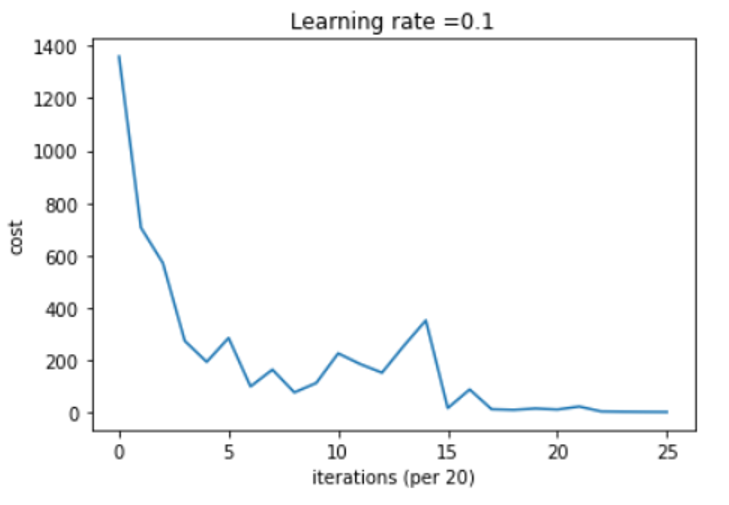

&emsp;&emsp;The cost function graph of the model we trained with the value of 0.01, which we consider to be the best choice. In the graph, it is seen that the cost function decreases rapidly at the beginning and slows down towards the end. As the model reaches its best state, it is updated first with large values and then with small values. 

### 2.4 Neural Network with One Hidden Layer<a name='2.4'></a>


<img src="https://cs231n.github.io/assets/nn1/neural_net.jpeg" width="400" height="250"/>

&emsp;&emsp;There is a hidden layer in our 2-layer neural network. We use activation functions,such as tanh relu sigmoid, other than softmax for this hidden layer. 

In [ ]:
layers_dims = [4096,64,10]
one_hl_activation_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
costs_rate = list()
for activation in ["tanh","sigmoid","relu"]:
    costs, score_train, score_test,params = model_func(layers_dims,0.1, epochs*8, data_batchs, label_batchs, X_test,y_test,activation)
    costs_rate.append(costs)
    
    y_pred = NN.predict_class(X_train.T, params, activation)
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, activation)
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    one_hl_activation_df.loc[str(activation)] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
one_hl_activation_df

| | Train f1-score | Train recall-score | Train precision-score | Train accuracy-score | Test f1-score | Test recall-score | Test precision-score | Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **tanh** | 0.999167 | 0.999167 | 0.999170 | 0.999167 | 0.160260 | 0.163333 | 0.168485 | 0.163333 |
| **sigmoid** | 0.358674 | 0.366250 | 0.368413 | 0.366250 | 0.187343 | 0.193333 | 0.196272 | 0.193333 |
| **relu** | 1.000000 | 1.000000 | 1.000000 | 1.000000 | 0.203535 | 0.206667 | 0.205546 | 0.206667 |

- Learning rate : 0.01
- epochs : 2560
- dimensions : [4096, 64, 10]
- batchs_size : 30

| | Train f1-score | Train recall-score | Train precision-score | Train accuracy-score | Test f1-score | Test recall-score | Test precision-score | Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **sigmoid** | 0.825242 | 0.826718 | 0.8237718 | 0.879167 | 0.149087 | 0.156268 | 0.142538 | 0.178253 |

&emsp;&emsp; Since the sigmoid function learns slowly compared to other functions, we increased its performance with different hyperparameters. 

- Learning rate : 0.1
- epochs : 3840
- dimensions : [4096, 64, 10]
- batchs_size : 30

#### 2.4.1 Compare Activation Function <a name='2.4.1'></a>
<table>
  <tr>
    <td><img src="https://miro.medium.com/max/1000/1*m_0v2nY5upLmCU-0SuGZXg.png" width=300 height=300></td>
    <td><img src="https://miro.medium.com/max/545/1*51Q7QouspCkOvENni2RwfQ.png" width=300 height=300></td>
    <td><img src="https://miro.medium.com/max/600/1*Myto4ZQagAOoyom4tqkaRQ.png" width=270 height=270></td>
  </tr>
 </table>
&emsp;&emsp; The Relu function can calculate much faster than the other two functions, as it sets 0 for negative values. It performs better than the sigmoid function due to its speed at small values in the number of iterations. However, it is a negative feature that it cannot make inferences from the values in that region because it equates negative values to 0.Having a wide range for positive values creates an important advantage. 

&emsp;&emsp; The output range of the Tanh function is [-1,1]. Due to this feature, it has the chance to get more values than the sigmoid function. However, it has some limitations due to the extreme estimates, which is a disadvantage. 

&emsp;&emsp; The sigmoid function can be a good classifier because it can reflect the difference in small X value changes. But it has some disadvantages. One of them is the efficiency problem. The other one is because of the derivative of the sigmoid function, we are likely to encounter the vanishing gradient problem. The problem is that our numerical data gets too small with each step back. Our values are sometimes too small for us to save. 

In [ ]:
one_hl_dims_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
costs_rate = list()
for layers_dim in [64*4, 64 , 16]:
    
    costs, score_train, score_test,params = model_func([4096,layers_dim,10],0.1, 301, data_batchs, label_batchs, X_test,y_test,"relu")
    costs_rate.append(costs)
    
    y_pred = NN.predict_class(X_train.T, params, activation)
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, activation)
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    one_hl_dims_df.loc[str(layers_dim)] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
one_hl_dims_df

| |Train f1-score|Train recall-score|Train precision-score|Train accuracy-score|Test f1-score|Test recall-score|Test precision-score|Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **256** | 0.989530 | 0.989583 | 0.989891 | 0.989583 | 0.239607 | 0.240000 | 0.269207 | 0.240000 |
| **64**  | 0.939015 | 0.939167 | 0.944389 | 0.939167 | 0.200064 | 0.206667 | 0.217023 | 0.206667 |
| **16**  | 0.616306 | 0.619167 | 0.644389 | 0.619167 | 0.197557 | 0.198333 | 0.216185 | 0.198333 |

#### 2.4.2 Compare Unit/Node Number in the Hidden Layer <a name='2.4.2'></a>

&emsp;&emsp; One of the features that makes our model more developable is the number of layer nodes. If this parameter is small, there will be a loss of information in the data coming from the large number of nodes. If it is large, there will be losses in the information level that it will send to the next layer. According to general acceptance, node reduction should be done gradually. <br>
&emsp;&emsp; Looking at the data in the table, the number of nodes decreasing from the input data of 4096 suffers the least amount of information loss at 256. As the number decreases, the accuracy values decrease. 

### 2.5 Neural Network with Two Hidden Layer <a name='2.5'></a>

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="400" height="250"/>

&emsp;&emsp;There is two hidden layer in our 3-layer neural network. We use activation functions,such as tanh relu sigmoid, other than softmax for this hidden layer. 

In [ ]:
layers_dims = [4096,128,32,10]
two_hl_activation_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
costs_rate = list()
for activation in ["tanh","sigmoid","relu"]:
    costs, score_train, score_test,params = model_func(layers_dims,0.1, epochs*2, data_batchs, label_batchs, X_test,y_test,activation)
    costs_rate.append(costs)
    
    y_pred = NN.predict_class(X_train.T, params, activation)
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, activation)
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    two_hl_activation_df.loc[str(activation)] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
two_hl_activation_df

| | Train f1-score | Train recall-score | Train precision-score | Train accuracy-score | Test f1-score | Test recall-score | Test precision-score | Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **tanh** | 0.950361 | 0.950417 | 0.955493 | 0.950417 | 0.184605 | 0.193333 | 0.213791 | 0.193333 |
| **sigmoid** | 0.066663 | 0.147917 | 0.650789 | 0.147917 | 0.054837 | 0.126667 | 0.669588 | 0.126667 |
| **relu** | 0.950095| 0.950000 | 0.954884 | 0.950000 | 0.186141 | 0.193333 | 0.216734 | 0.193333 |

#### 2.5.1 Compare Activation Function <a name='2.5.1'></a>

&emsp;&emsp; The results we have compared above also work for the neural network where we increase the number of layers. Learning rate: 0.01; For the epoch value of 2560, the sigmoid value learns slower than the other activation functions. For a more successful neural network with sigmoid function, we should increase the learning rate. 

In [ ]:
two_hl_layers_dims_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
costs_rate = list()
for layers_dim in [ 128 , 64 ,32, 16]:
    
    costs, score_train, score_test,params = model_func([4096,64*4,layers_dim,10],0.01, epochs, data_batchs, label_batchs, X_test,y_test,"relu")
    costs_rate.append(costs)
    
    y_pred = NN.predict_class(X_train.T, params, activation)
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, activation)
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    two_hl_layers_dims_df.loc[str(layers_dim)] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
two_hl_layers_dims_df

| |Train f1-score|Train recall-score|Train precision-score|Train accuracy-score|Test f1-score|Test recall-score|Test precision-score|Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **256** | 0.989197 | 0.989167 | 0.989434 | 0.989167 | 0.239305 | 0.238333 | 0.249190 | 0.238333 |
| **128** | 0.971865 | 0.971667 | 0.973314 | 0.971667 | 0.234606 | 0.235000 | 0.248262 | 0.235000 |
| **64**  | 0.933970 | 0.934167 | 0.939022 | 0.934167 | 0.232844 | 0.240000 | 0.246426 | 0.240000 |
| **16**  | 0.831333 | 0.830000 | 0.841831 | 0.830000 | 0.219134 | 0.223333 | 0.241015 | 0.223333 |

#### 2.5.2 Compare Unit/Node Number in the Hidden Layer <a name='2.5.2'></a>

&emsp;&emsp; The results we have compared above also work for the neural network where we increase the number of layers. 

### 2.6 Multi Layer  Neural Network <a name='2.6'></a>

<img src="https://www.researchgate.net/publication/330230427/figure/fig5/AS:962670173892631@1606529863497/A-multi-layer-neural-network-with-n-inputs-at-least-two-hidden-layers-and-one-output.png" width="400" height="250"/>


&emsp;&emsp;Thanks to the code we wrote, we can determine the number of layers, the number of nodes in the layers and the activation function.

In [ ]:
all_batchs = list()
all_label_batchs = list()
batch_size_list = [10,20,40];
for x in batch_size_list:
    data_batchs = list()
    label_batchs = list()
    batch_size = x
    epochs = len(X_train) // batch_size
    for i in range(epochs):
        data_batchs.append(X_train[i * batch_size: batch_size * (1+i)])
        label_batchs.append(y_train[i * batch_size: batch_size * (1+i)])
    all_batchs.append(data_batchs)
    all_label_batchs.append(label_batchs)


In [ ]:
multi_hl_batch_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
costs_rate = list()

for index in range(len(all_batchs)):
    costs, score_train, score_test,params = model_func([4096,128,64,16,10],0.01,epochs * 20 , all_batchs[index], all_label_batchs[index], X_test,y_test,"relu")
    costs_rate.append(costs)
    
    y_pred = NN.predict_class(X_train.T, params, "relu")
    test_y = np.argmax(y_train,axis=1) 
    f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_train = accuracy_score(test_y,y_pred)
    
    y_pred = NN.predict_class(X_test.T, params, "relu")
    test_y = np.argmax(y_test,axis=1) 
    f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
    recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
    precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
    acc_test = accuracy_score(test_y,y_pred)    
    
    multi_hl_batch_df.loc[str(batch_size_list[index])] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
multi_hl_batch_df

| | Train f1-score | Train recall-score | Train precision-score | Train accuracy-score | Test f1-score | Test recall-score | Test precision-score | Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **10** | 0.997500 | 0.99750 | 0.997531 | 0.99750 | 0.219089 | 0.230000 | 0.234308 | 0.230000 |
| **20** | 1.000000 | 1.00000 | 1.000000 | 1.00000 | 0.228253 | 0.228333 | 0.239871 | 0.228333 |
| **40** | 0.998748 | 0.99875 | 0.998759 | 0.99875 | 0.237320 | 0.236667 | 0.248944 | 0.236667 |

#### 2.6.1 Mini-Batch Gradient Descent <a name='2.6.1'></a>

&emsp;&emsp; In this assignment, we used the Mini-Batch Gradient Descent algorithm, which is a type of Gradient Descent algorithm. Gradient Descent is an optimization algorithm that helps us find the best weights and bias, by using error values while training our model.

&emsp;&emsp; The biggest advantage of mini-batch is that by dividing the data set into small pieces, we can use the whole data by overcoming the computer hardware barrier. Generally, batch size values are determined in the range of 16-512. 

### 2.7 Neural Network with Optimal Hyperparameters <a name='2.7'></a>

In [8]:
data_batchs_opt = list()
label_batchs_opt = list()
batch_size_opt = 40
epochs_opt = len(X_train) // batch_size_opt
for i in range(epochs_opt):
    data_batchs_opt.append(X_train[i * batch_size_opt: batch_size_opt * (1+i)])
    label_batchs_opt.append(y_train[i * batch_size_opt: batch_size_opt * (1+i)])

In [ ]:
optimal_df = pd.DataFrame(columns=["Train f1-score","Train recall-score","Train precision-score","Train accuracy-score","Test f1-score","Test recall-score","Test precision-score","Test accuracy-score"])
    
costs, score_train, score_test,params = model_func([4096,128,32,10],0.01, 301, data_batchs_opt, label_batchs_opt, X_test,y_test,"relu")

y_pred = NN.predict_class(X_train.T, params, "relu")
test_y = np.argmax(y_train,axis=1) 
f1_train = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
recall_train = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
precision_train = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
acc_train = accuracy_score(test_y,y_pred)

y_pred = NN.predict_class(X_test.T, params, "relu")
test_y = np.argmax(y_test,axis=1) 
f1_test = f1_score(test_y,y_pred, average="weighted", zero_division = 1)
recall_test = recall_score(test_y,y_pred, average="weighted", zero_division = 1)
precision_test = precision_score(test_y,y_pred, average="weighted", zero_division = 1)
acc_test = accuracy_score(test_y,y_pred)    

optimal_df.loc[str("optimal")] = [f1_train, recall_train, precision_train, acc_train, f1_test, recall_test, precision_test, acc_test]
optimal_df

| | Train f1-score | Train recall-score | Train precision-score | Train accuracy-score | Test f1-score | Test recall-score | Test precision-score | Test accuracy-score |
|:--:|---|---|----|---|---|---|---|---|
| **optimal** | 0.978803 | 0.97875 | 0.979301 | 0.97875 | 0.224202 | 0.225000 | 0.238367 | 0.225000 |

&emsp;&emsp; We recorded the weight and bias values of the model we created with the optimal hyperparameters. 

In [22]:
import json
par = params.copy()
for k,v in par.items():
    par[k] = par[k].tolist()
with open('part1_optimalmodelparams.txt', 'w') as convert_file:
    convert_file.write(json.dumps(par))

&emsp;&emsp; We observe from the graph that the cost value decreases rapidly. 

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per 20)')
plt.title("Learning rate =" + str(0.01))
plt.show()

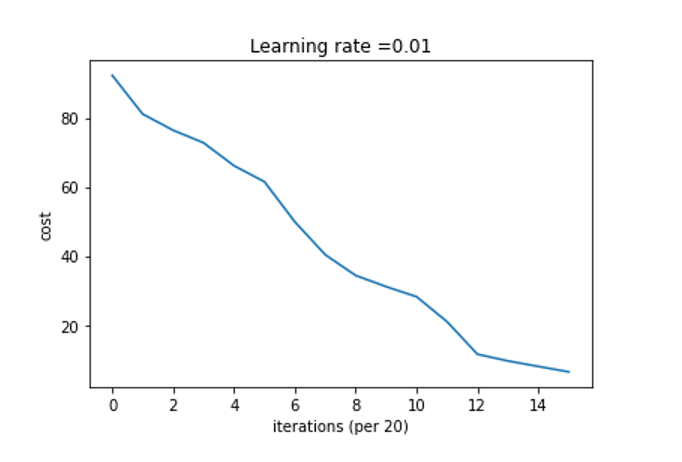

In [ ]:
y_pred = NN.predict_class(X_train.T, params, "relu")
test_y = np.argmax(y_train,axis=1) 
cm_train = confusion_matrix(test_y, y_pred)

y_pred = NN.predict_class(X_test.T, params, "relu")
test_y = np.argmax(y_test,axis=1) 
cm_test = confusion_matrix(test_y, y_pred)


keys_label = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno" : "spider", "scoiattolo": "squirrel"}
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=keys_label.values())
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=keys_label.values())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
disp.plot(ax=ax1, cmap='GnBu')
disp2.plot(ax=ax2, cmap='GnBu')
ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
ax1.set_title('Predicted with Train Data', fontsize=16)
ax2.set_title('Predicted with Test Data', fontsize=16)

plt.show()

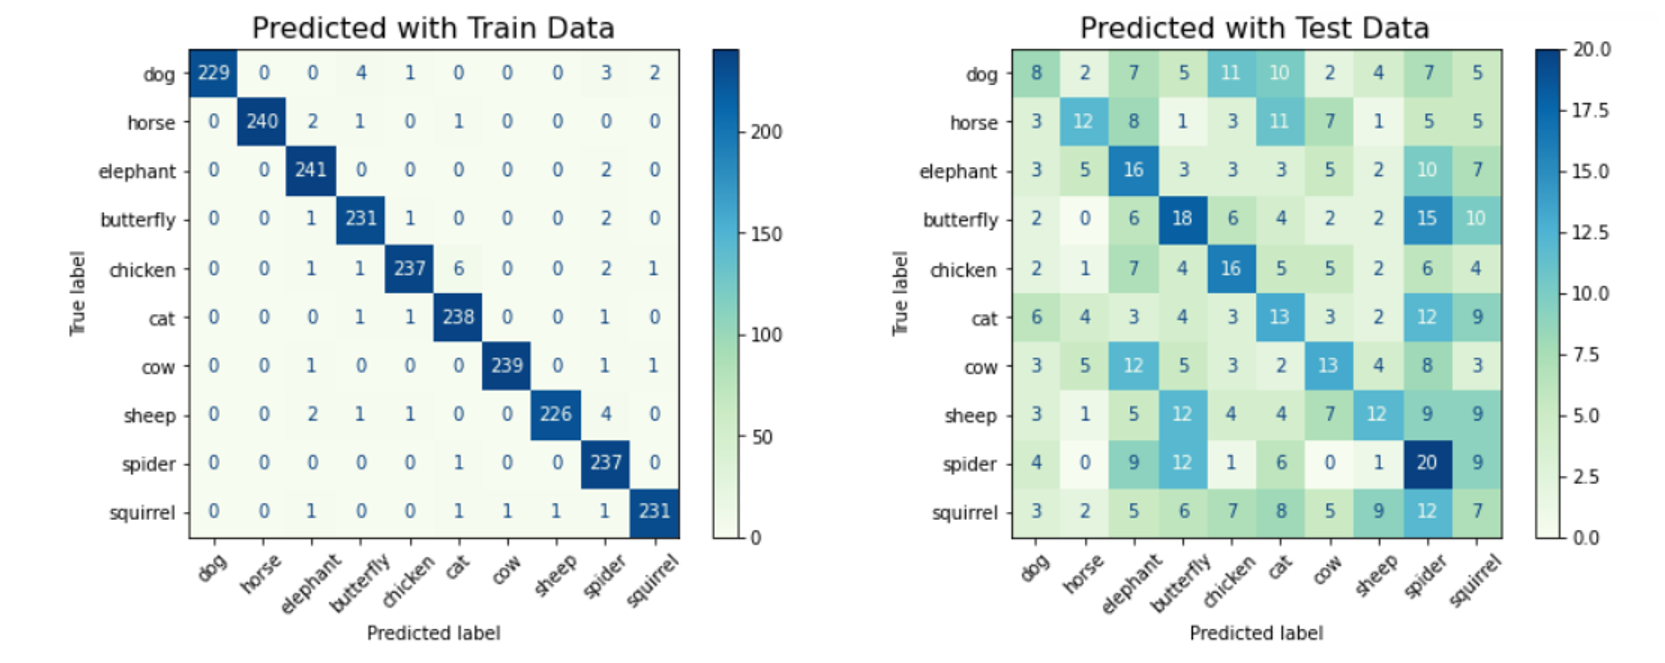

&emsp;&emsp; We visualized our confusion matrices with both the train set and the test set. For both matrices, the most preferred class in our wrong predictions was the spider class. We can attribute this to the fact that it creates diversity with the different appearance of the spider in spider photos. The Horse class, on the other hand, was the least preferred class in our wrong choices. This means that we can say that the visuals of the horse class are more similar to each other than the other classes. 

#### Overfitting Problem

&emsp;&emsp; In all our general results, we observed that our data encountered an overfit problem. We tried to use L2 regularization and early stopping techniques to solve this problem. We got results between 15-30% in our test results. 

## 3. Part 2: Convolutional Neural Network <a name='3'></a>

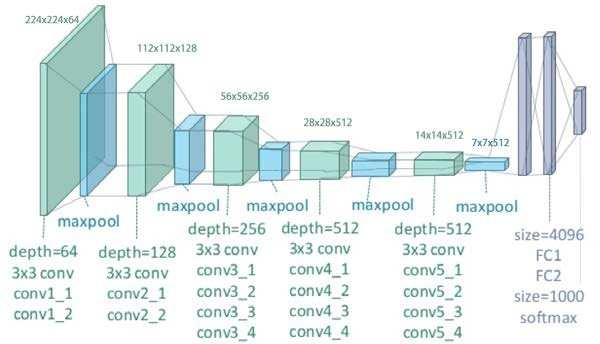

&emsp;&emsp; In this part of the assignment, We used pretrained VGG-19 convolutional neural network and finetune this network to classify the sample images. We trained the model with two different cases when finetuning the CNN network:

<ol>
    <li> We finetune the weights of all layers in the VGG-19 network (Fine-tuned model). 
    <ul>  
         <li>In fine-tuned model, we changed the last layer to match the classes in our dataset. We also                retrained all the layers of the network.</li>   
    </ul>     
    </li> 
    
    <li> You will finetune the weights of only two last fully connected layers in the VGG-19 network                (Feature extracted model) 
    <ul>  
         <li> We used pretrained weight for all layers except fully connected layers in feature extracted               model. We change two FC layers dimensions as (4096,2048), (2048,10).</li>   
    </ul>     
    </li> 

</ol>


### 3.1 Required Libraries for Part 2 <a name='3.1'></a>

In [102]:
import time
import os
import copy

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import models, transforms
from torch.autograd import Variable

### 3.2 Hyperparameter Tuning <a name='3.2'></a>
&emsp;&emsp; We have different size of images belonging 10 classes, when we used VGG-19 model our input size will be 224, and output size (num_classes) will be 10. <br>
&emsp;&emsp; When we choose small -like 1- batch size It going to produce noiser gradient descent. Also, when we choose big batch size -like 128 or 256- we get memory error on GPU. So the best choice seems to be 64. <br>
&emsp;&emsp; When learning rate too small, gradient descent can be slow. When learning rate is too large, gradient descent can miss the minimum. We use relatively small learning rate, because our model already trained with big imageset and we don't want to change weights too much.

In [2]:
input_size = 224

# Number of classes in the dataset, we use it for output layer.
num_classes = 10

# Batch size for training.
batch_size = 64

# Number of epochs to train for.
num_epochs = 50

# Learning rate for training.
learning_rate = 0.001

### 3.3 Get Data <a name='3.3'></a>
Our dataset hierarchy:
<ul>  
    <li> raw-image
        <ul>  
            <li> cane
            <ul>  
                <li> 1.jpeg</li>
                <li> 2.jpeg</li> 
                <li> ... </li>   
            </ul>  
            </li>
            <li> cavallo
            <ul>  
                <li> 1.jpeg</li>
                <li> 2.jpeg</li> 
                <li> ... </li>   
            </ul>  
            </li>
    <li> ... </li>   
     </ul>  
</ul>   

&emsp;&emsp; Since we did not have enough hardware, we could not use all of the data in training. We trained the model, in which we used 200 images from all classes, with a total of 2000 images.

In [3]:
translate = {'cane': 'dog',
             'cavallo': 'horse',
             'elefante': 'elephant',
             'farfalla': 'butterfly',
             'gallina': 'chicken',
             'gatto': 'cat',
             'mucca': 'cow',
             'pecora': 'sheep',
             'ragno': 'spider',
             'scoiattolo': 'squirrel'}

In [4]:
# Images are resized constentient with VGG-19 model's input size 
#     and normalized with ImageNet dataset's mean and std.
transform = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

class CustomDataset(Dataset):    
    def __init__(self, path):
        self.imgs_path = path
        file_list = glob.glob(self.imgs_path + "*")
        self.data = list()
        self.class_map = dict()
        i = 0
        for class_path in file_list:
            class_name = class_path.split("/")[-1][8:]
            self.class_map[translate[class_name]] = i
            i +=1
            for img_path in glob.glob(class_path + "/*.jpeg")[:200]:
                self.data.append([img_path, translate[class_name]]) 

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = Image.open(img_path) 
        img_tensor = transform(img)
        class_id = self.class_map[class_name]
        class_id = torch.tensor([class_id])
        return img_tensor.float(), class_id  

In [5]:
# Data directory. 
data_dir = "raw-img/"

# All data.
image_datasets = CustomDataset(path=data_dir)

# Creating data indices for training,validation and test splits:
ratio = .2
data_size = len(image_datasets)
indices = list(range(data_size))
np.random.seed(31)
np.random.shuffle(indices)
train_indices = indices[:int(data_size * (1 - (2*ratio)))]
val_indices = indices[int(data_size * (1 - (2*ratio))):int(data_size * (1 - ratio))]
test_indices = indices[int(data_size * (1 - ratio)):]

# The datasets which we use in training step.
train_sampler = SubsetRandomSampler(train_indices)
train_loader = torch.utils.data.DataLoader(image_datasets, batch_size=batch_size, sampler=train_sampler)
valid_sampler = SubsetRandomSampler(val_indices)
validation_loader = torch.utils.data.DataLoader(image_datasets, batch_size=batch_size, sampler=valid_sampler)

# The data which we use test step.
test_sampler = SubsetRandomSampler(test_indices)
test_loader = torch.utils.data.DataLoader(image_datasets, batch_size=batch_size, sampler=test_sampler)

# Create training and validation dataloaders
dataloaders_dict = {'train': train_loader, 
                    'val': validation_loader}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 3.4 Using Pre-trained Model with Pytorch <a name='3.4'></a>

In [6]:
def initialize_model(num_classes, train_all_network, use_pretrained=True):
    model_vgg = models.vgg19(pretrained=use_pretrained)

    # We finetune the weights of all layers in the VGG-19 network.
    if train_all_network:
        # Soft-max
        softmax_num_ftrs = model_vgg.classifier[6].in_features 
        model_vgg.classifier[6] = nn.Linear(softmax_num_ftrs, num_classes)
    
    # We only update the weights of only two last fully connected layers in the VGG-19 network.
    else:        
        for param in model_vgg.parameters():
            param.requires_grad = False       
            
        # FC 1
        fc1_num_ftrs = model_vgg.classifier[0].in_features        
        model_vgg.classifier[0] = nn.Linear(fc1_num_ftrs, 4096)
        # FC 2
        model_vgg.classifier[3] = nn.Linear(4096, 2048)        
        # Soft-max
        model_vgg.classifier[6] = nn.Linear(2048, num_classes)
        
    return model_vgg

In [7]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs):
    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    print('Training started...')
    for epoch in range(1, num_epochs + 1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward propagation
                with torch.set_grad_enabled(phase == 'train'):
                    
                    # Get model outputs and calculate loss                    
                    outputs = model(inputs)
                    labels = labels.squeeze_()
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [8]:
model_vgg = initialize_model(num_classes, train_all_network=False, use_pretrained=True)

# Send the model to GPU
model_vgg = model_vgg.to(device)

params_to_update = model_vgg.parameters()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=learning_rate, momentum=0.9)

# Negative Log Likelihood Loss Function
criterion = nn.CrossEntropyLoss()

# Uncomment for Train and evaluate
# model_vgg, hist = train_model(model_vgg, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

&emsp;&emsp; You can see how we initialize and train model above. However, for the efficiency of this report, we will use the weights we received from our training both two model. Our changes printed.

In [9]:
# Initialize the model for this run
feature_extracted_model= initialize_model(num_classes, train_all_network=False, use_pretrained=True)
feature_extracted_model.load_state_dict(torch.load('fe_model_params.pt', map_location=torch.device('cpu'))) # fc_layer_model.pt
feature_extracted_model.eval()
print(feature_extracted_model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=2048, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=2048, out_features=10, bias=True)
)


In [10]:
fine_tuned_model = initialize_model(num_classes, train_all_network=True, use_pretrained=True)
fine_tuned_model.load_state_dict(torch.load('ft_model_params.pt', map_location=torch.device('cpu')))
fine_tuned_model.eval()
print(fine_tuned_model.classifier[6])

Linear(in_features=4096, out_features=10, bias=True)


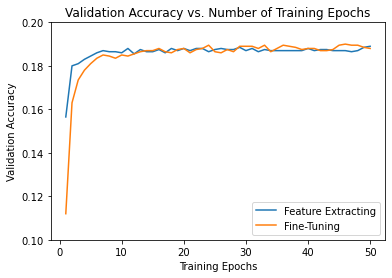

In [11]:
hist = torch.load('fc_cost.pt')
scratch_hist = torch.load('ft_cost.pt')

ohist = []
shist = []

ohist = [h.cpu().numpy() for h in hist]
shist = [h.cpu().numpy() for h in scratch_hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Feature Extracting")
plt.plot(range(1,num_epochs+1),shist,label="Fine-Tuning")
plt.ylim((.1,.2))
plt.xticks(np.arange(0, num_epochs+1, 10))
plt.legend()
plt.show()

### 3.5 Visualize Weight and Activation Matrices First Convolutional Layer <a name='3.5'></a>

In [100]:
def custom_viz(kernels):
    """
    Arguments
    =========
    kernels: Weight or activation matrix. Must be a high dimensional
    Numpy array. Tensors will not work.
    """
    def set_size(w,h, ax=None):
        """ w, h: width, height in inches """
        if not ax:
            ax=plt.gca()
        l = ax.figure.subplotpars.left
        r = ax.figure.subplotpars.right
        t = ax.figure.subplotpars.top
        b = ax.figure.subplotpars.bottom
        figw = float(w)/(r-l)
        figh = float(h)/(t-b)
        ax.figure.set_size_inches(figw, figh)
    
    Tot =  kernels.shape[0] * kernels.shape[1]
    pos = range(1, Tot + 1)

    fig = plt.figure(1)
    fig.tight_layout()
    k=0
    for i in range(kernels.shape[0]):
        for j in range(kernels.shape[1]):
            img = kernels[i][j]
            ax = fig.add_subplot(Tot//8, 8, pos[k])
            ax.imshow(img, cmap='gray')
            plt.axis('off')
            k = k+1

    set_size(30,30,ax)
    plt.show()

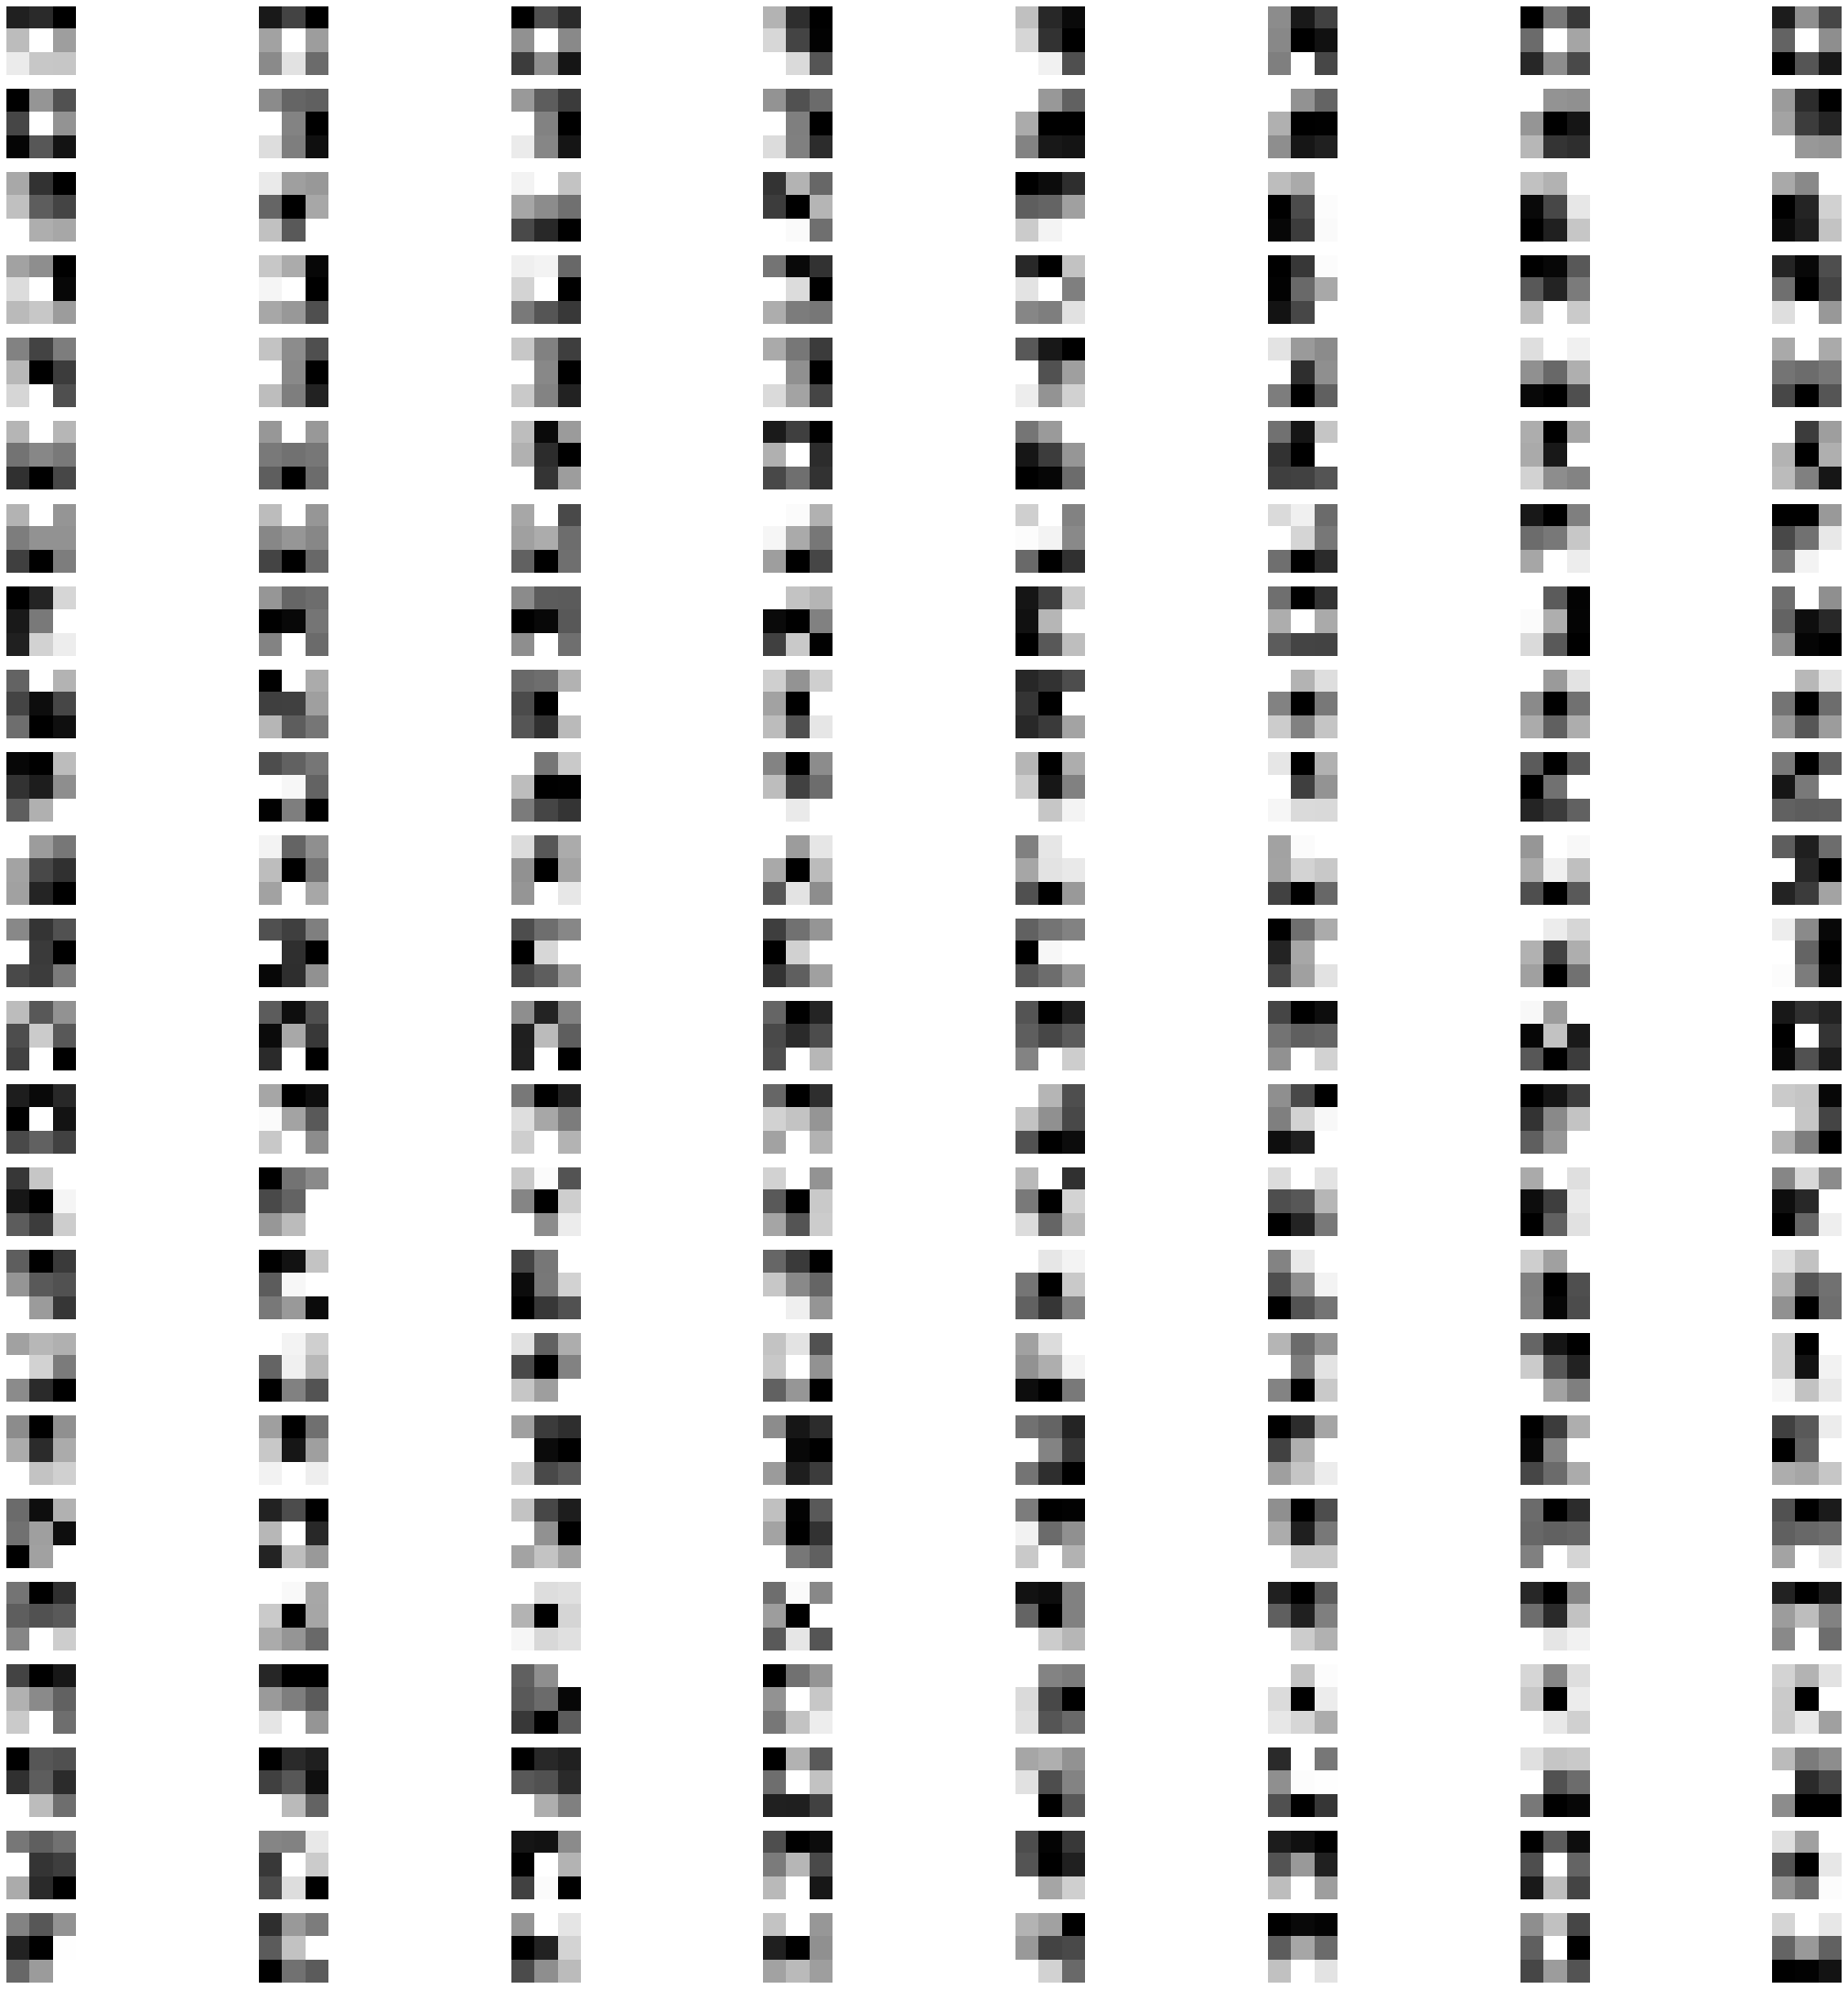

In [101]:
kernels = feature_extracted_model.features[0].weight.cpu().detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
custom_viz(kernels)

Predicted Class:  squirrel


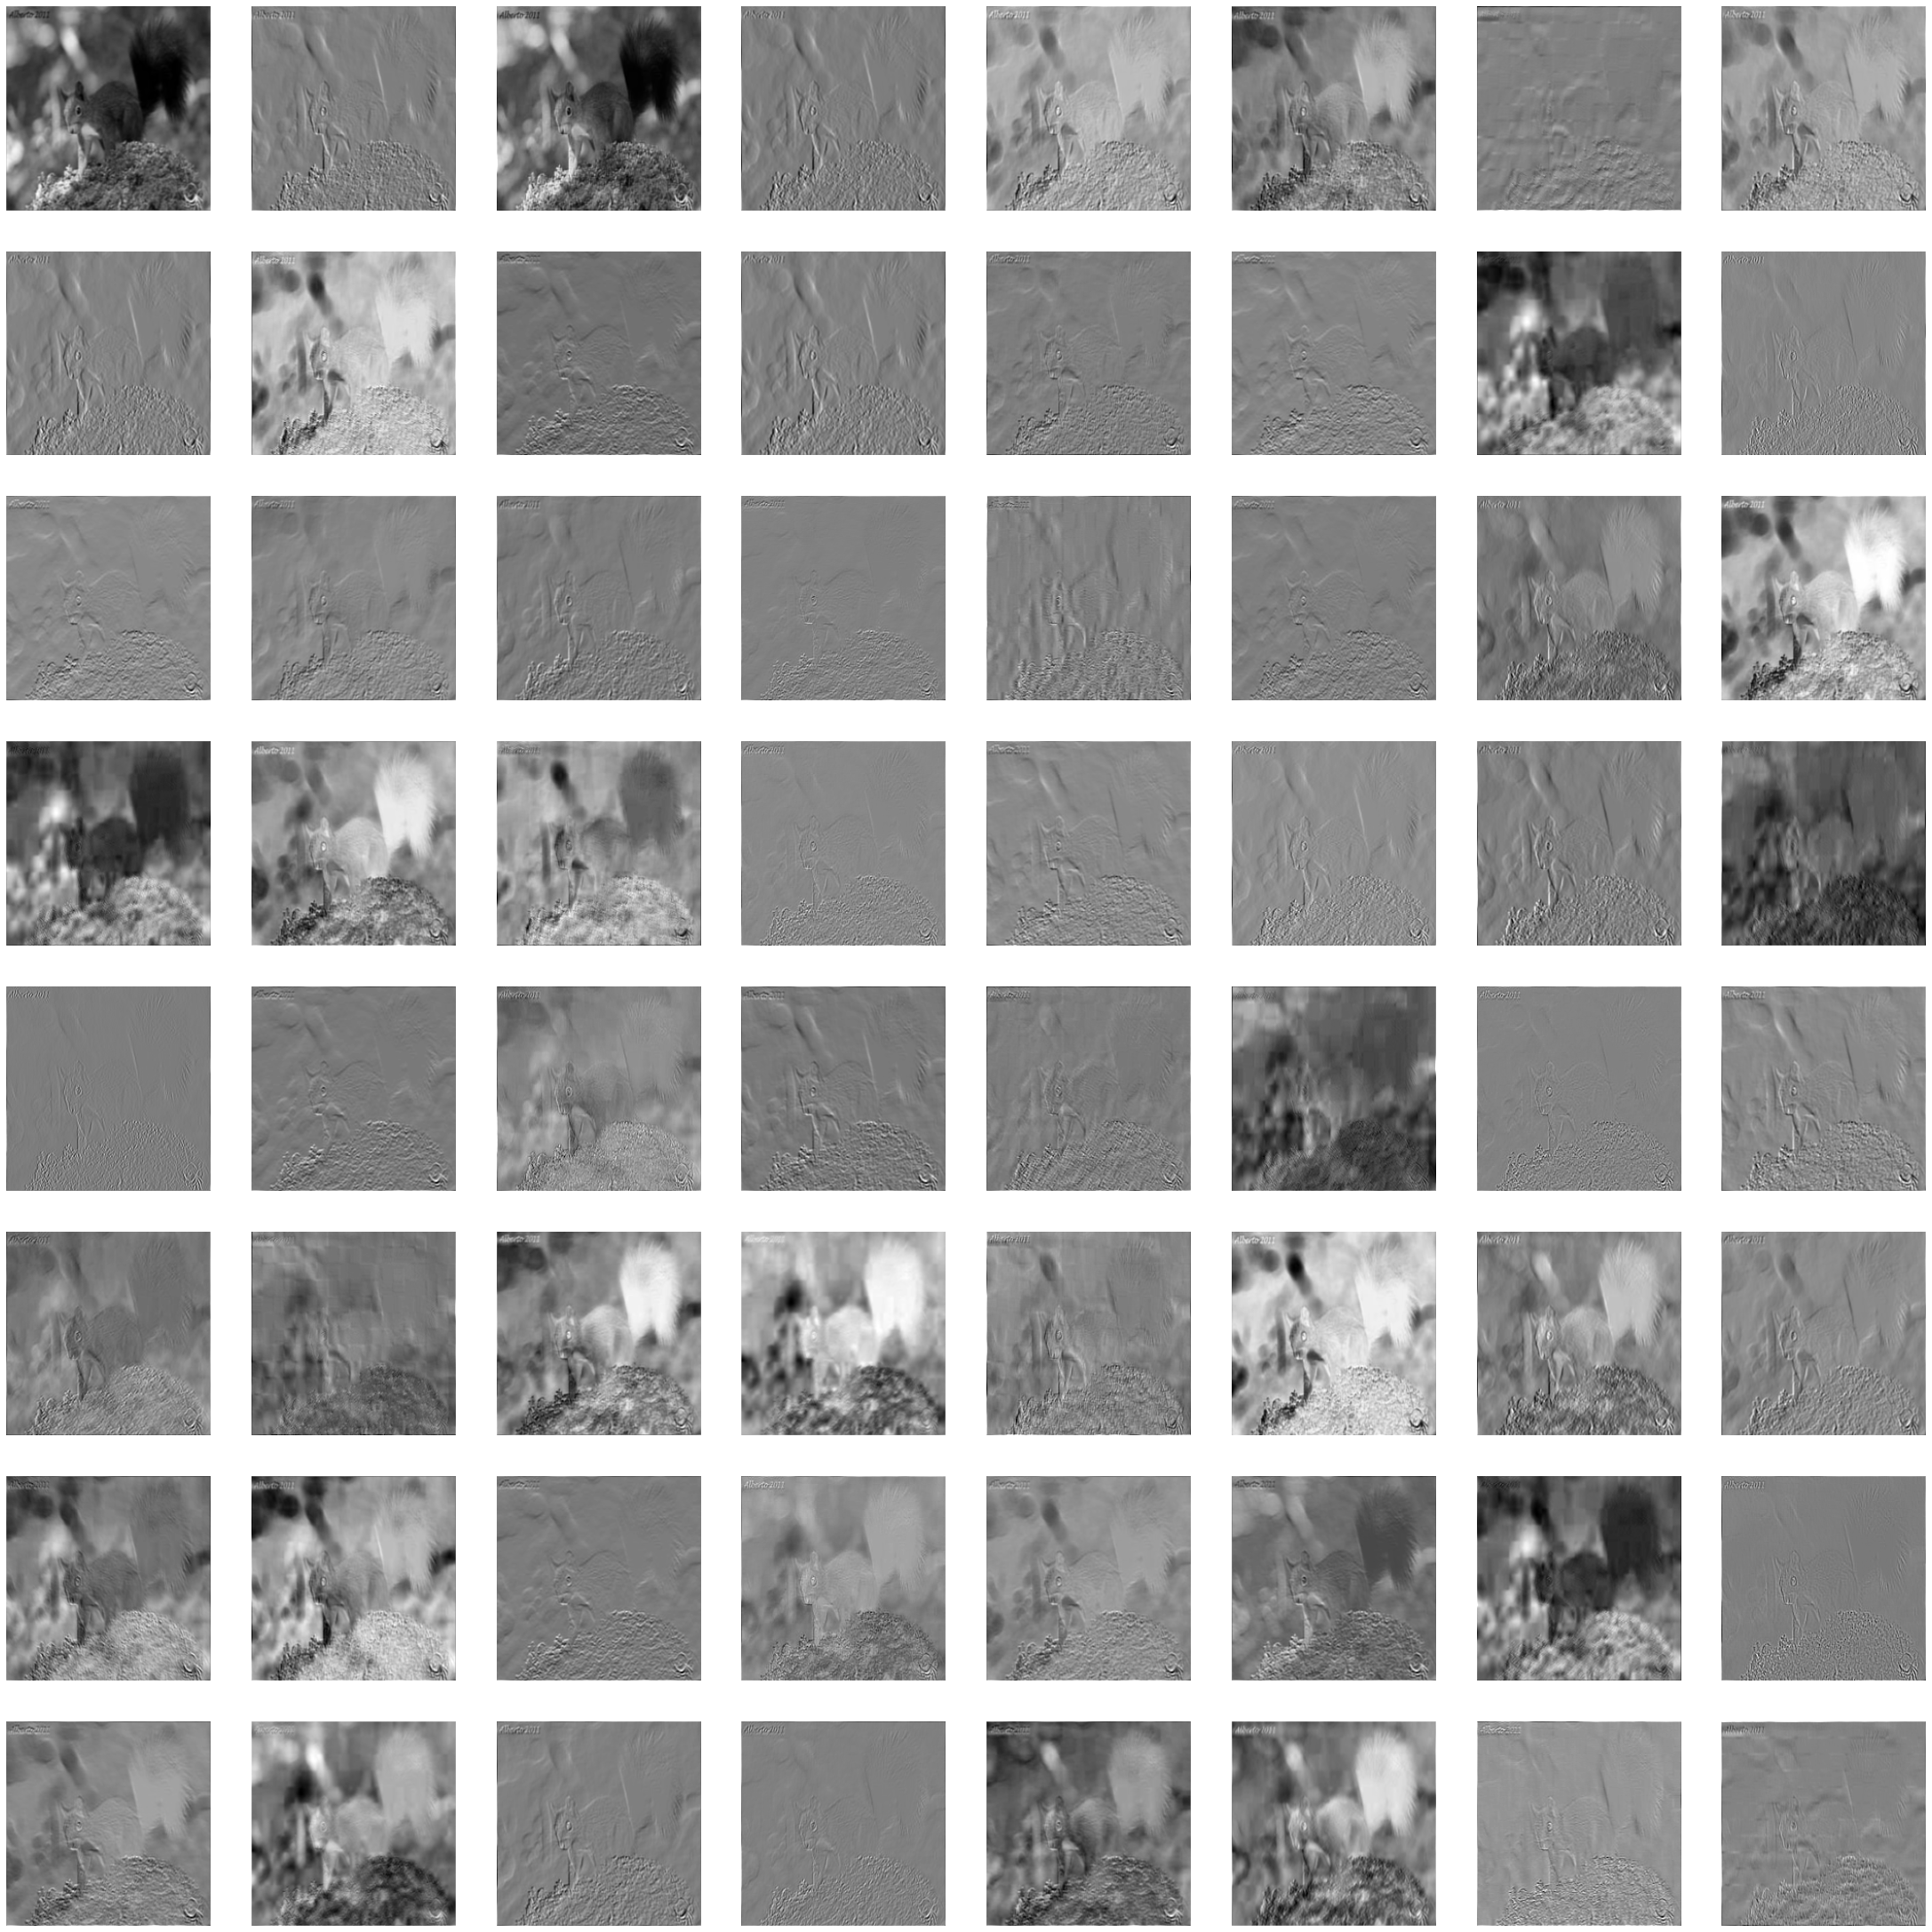

In [105]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
number = example_data[4].unsqueeze_(0)
number = Variable(number, requires_grad=True)

c =  np.argmax(feature_extracted_model.forward(number).cpu().detach().numpy())
print("Predicted Class: ", list(image_datasets.class_map.keys())[c])

conv1_out = feature_extracted_model.features[0].forward(number)
custom_viz(conv1_out.cpu().detach().clone())

### 3.6 Predict <a name='3.6'></a>

In [12]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    

In [13]:
def predict_model(model, dataloader, label_map, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    y_true = list()
    y_preds = list()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                
                y_true.append(int(labels[j]))                
                y_preds.append(int(preds[j]))            
                
                if images_so_far < num_images:
                    plt.title('predicted: {}'.format(list(label_map.keys())[preds[j]]))
                    imshow(inputs.cpu().data[j])

        model.train(mode=was_training)
        
    return y_true, y_preds

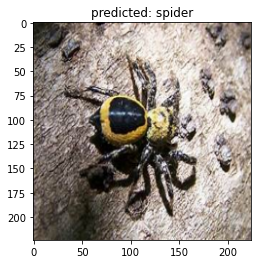

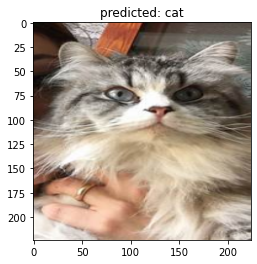

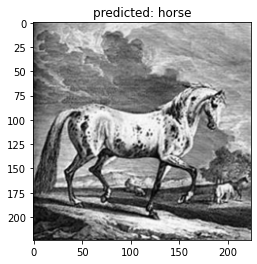

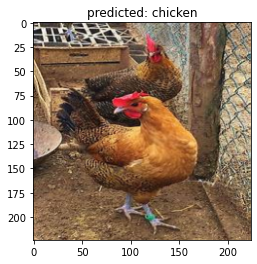

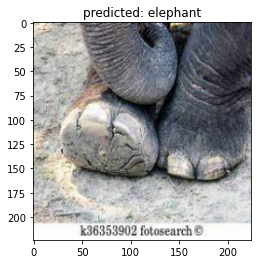

In [14]:
y_true_feature_extracted, y_preds_feature_extracted = predict_model(feature_extracted_model, test_loader, image_datasets.class_map, num_images=6)

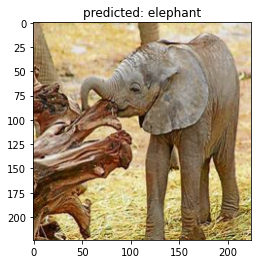

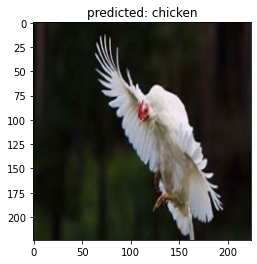

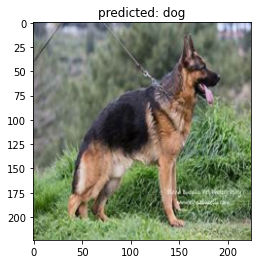

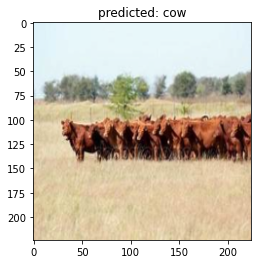

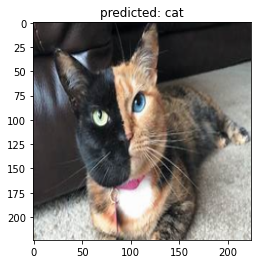

In [15]:
y_true_fine_tuned, y_preds_fine_tuned = predict_model(fine_tuned_model, test_loader, image_datasets.class_map, num_images=6)

### 3.7 Analysis Metrics <a name='3.7'></a>
&emsp;&emsp; As you can see the table below there is no meaningful difference between two model. We think main reason for this is we use pretrained model for both model. Both two model was successful to predict true class for given images.

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_fe = accuracy_score(y_true_feature_extracted, y_preds_feature_extracted)
precision_fe = precision_score(y_true_feature_extracted, y_preds_feature_extracted, average="weighted")
recall_fe = recall_score(y_true_feature_extracted, y_preds_feature_extracted, average="weighted")
f1_fe = f1_score(y_true_feature_extracted, y_preds_feature_extracted, average="weighted")
cm_fe = confusion_matrix(y_true_feature_extracted, y_preds_feature_extracted)

accuracy_ft = accuracy_score(y_true_fine_tuned, y_preds_fine_tuned)
precision_ft = precision_score(y_true_fine_tuned, y_preds_fine_tuned, average="weighted")
recall_ft = recall_score(y_true_fine_tuned, y_preds_fine_tuned, average="weighted")
f1_ft = f1_score(y_true_fine_tuned, y_preds_fine_tuned, average="weighted")
cm_ft = confusion_matrix(y_true_fine_tuned, y_preds_fine_tuned)

In [116]:
d = {"Feature Extracted Model":[accuracy_fe, precision_fe, recall_fe, f1_fe],
    "Fine-Tuned Model": [accuracy_ft, precision_ft, recall_ft, f1_ft]}

import pandas as pd
tab = pd.DataFrame(d.values(), index = d.keys(), columns = ["Accuracy", "Precision", "Recall", "F1 Score"])
tab

Accuracy  Precision  Recall  F1 Score
Feature Extracted Model    0.9425   0.946405  0.9425  0.943098
Fine-Tuned Model           0.9575   0.957991  0.9575  0.957419

&emsp;&emsp; When we looking at the confusion matrices, we can see there is difference between predict 'squirrel' class. In feature extracted model we just train last 3 FC layer, we think the data which was used pre-train not include enough image to learn 'squirrel' class. So, the model which we train all layer was more succesfull to predict 'squirrel' class.

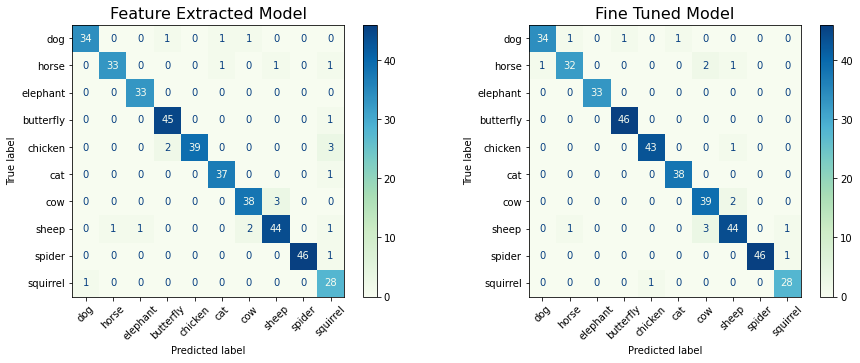

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fe, display_labels=image_datasets.class_map.keys())
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_ft, display_labels=image_datasets.class_map.keys())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
disp.plot(ax=ax1, cmap='GnBu')
disp2.plot(ax=ax2, cmap='GnBu')
ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
ax1.set_title('Feature Extracted Model', fontsize=16)
ax2.set_title('Fine Tuned Model', fontsize=16)

plt.show()

## 4. Discussion <a name='4'></a>
&emsp;&emsp; Our data contains images from 10 different classes. We tried two Deep Learning techniques, Multi-Layer Neural Network and CNN, on this data. We have obtained the following results. 



| | Accuracy | Precision | Recall | F1 Score |
|:--:|---|---|----|---|
| CNN - Feature Extracted Model - Test Data | 0.9425 | 0.946405 | 0.9425 | 0.943098 |
| CNN - Fine-Tuned Model - Test Data | 0.9575 | 0.957991 | 0.9575 | 0.957419 |
| Multi-Layer NN - Optimal - Test Data | 0.224202 | 0.225000 | 0.238367 | 0.225000 |
| Multi-Layer NN - Optimal - Train Data | 0.978803 | 0.97875 | 0.979301 | 0.97875 |


&emsp;&emsp; When we look at our results, we observe that the CNN technique is a more efficient technique for the image classification problem. CNN technique provides an important convenience in terms of establishing fast models with data, visualizing the intermediate layers of the model and making sense of it. 


&emsp;&emsp; The most challenging part of this assignment was the size of the data and the inadequacy of the computer hardware. In our opinion, we can improve our model much more by increasing the number of data and small changes in hyperparameters.  

## 5. References <a name='5'></a>
- Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron
- Deep Learning by Aaron Courville, Ian Goodfellow, and Yoshua Bengio
- [Understanding softmax and the negative log-likelihood](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
- [CS231n: Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/)
- [Training a Classifier - PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [torchvision.models - VGG](https://pytorch.org/vision/stable/models.html)
- [Stanford CS229: Machine Learning](https://www.youtube.com/watch?v=jGwO_UgTS7I&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)